# Day01

In [12]:
lines = [x.strip() for x in open('day01.in').readlines()]
vals = [int(x) for x in lines]

In [13]:
sum(vals)

477

In [15]:
#Part 2
t = 0
used = set([0])
done = False
while not done:
    for v in vals:
        t += v
        if t in used:
            print(t)
            done = True
            break
        used.add(t)
    

390


# Day 02

In [16]:
lines = [x.strip() for x in open('day02.in').readlines()]

In [22]:
import collections
def to_bag(s):
    d = collections.defaultdict(int)
    for i in s:
        d[i] += 1
    return d

def has_count(d, count):
    for v in d.values():
        if v == count:
            return True
    return False
bags = [to_bag(x) for x in lines]
has_two = [has_count(x, 2) for x in bags]
has_three = [has_count(x, 3) for x in bags]
sum(has_two), sum(has_three), sum(has_two) * sum(has_three)

(250, 20, 5000)

In [24]:
# Part 2
def diff_strings(s1, s2):
    return sum([x[0] != x[1] for x in zip(s1, s2)])

def same_letters(s1, s2):
    retval = ""
    for a, b in zip(s1, s2):
        if a == b:
            retval += a
    return retval

for p1 in lines:
    for p2 in lines:
        if diff_strings(p1, p2) == 1:
            print(same_letters(p1, p2))

ymdrchgpvwfloluktajxijsqb
ymdrchgpvwfloluktajxijsqb


# Day 03

In [31]:
lines = [x.strip() for x in open('day03.in').readlines()]

In [33]:
import re
def parse_line(s):
    return [int(x) for x in re.findall("\d+", s)[1:]]
parse_line(lines[0])

[265, 241, 16, 26]

In [49]:
import numpy as np
width, height = 10000, 10000
grid = np.zeros((width, height))
def mark_grid(grid, tup):
    sx, sy = tup[0], tup[1]
    dx, dy = tup[2], tup[3]
    grid[sx:sx+dx,sy:sy+dy] += 1
for l in lines:
    t = parse_line(l)
    mark_grid(grid, t)
np.sum(grid.flatten() > 1)

101781

In [50]:
# Part 2

In [51]:
def is_unique(grid, tup):
    sx, sy = tup[0], tup[1]
    dx, dy = tup[2], tup[3]
    return np.all(grid[sx:sx+dx,sy:sy+dy] == 1)
for l in lines:
    t = parse_line(l)
    if is_unique(grid, t):
        print(l)

#909 @ 593,172: 15x25


# Day 04

In [1]:
lines = [x.strip() for x in open('day04.in').readlines()]

In [2]:
lines = sorted(lines)

In [3]:
import datetime

In [4]:
datetime_object = datetime.datetime.strptime('1518-02-10 23:47', '%Y-%m-%d %H:%M')

In [5]:
datetime.timedelta(minutes=1)

datetime.timedelta(0, 60)

In [17]:
import re
def get_state(s):
    if s.find('falls') > -1:
        return "Asleep"
    if s.find('wakes') > -1:
        return "Awake"
    return re.findall("\d+", s)[0]

def get_time(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d %H:%M')

def parse_line(s):
    vals = s.split('] ')
    my_time = vals[0].strip('[')
    my_state = vals[1]
    return get_time(my_time), get_state(my_state)
table = [parse_line(x) for x in lines]
table[:50]

[(datetime.datetime(1518, 2, 10, 23, 47), '631'),
 (datetime.datetime(1518, 2, 11, 0, 3), 'Asleep'),
 (datetime.datetime(1518, 2, 11, 0, 19), 'Awake'),
 (datetime.datetime(1518, 2, 12, 0, 3), '983'),
 (datetime.datetime(1518, 2, 12, 0, 9), 'Asleep'),
 (datetime.datetime(1518, 2, 12, 0, 48), 'Awake'),
 (datetime.datetime(1518, 2, 12, 23, 59), '1069'),
 (datetime.datetime(1518, 2, 13, 0, 43), 'Asleep'),
 (datetime.datetime(1518, 2, 13, 0, 55), 'Awake'),
 (datetime.datetime(1518, 2, 13, 23, 57), '587'),
 (datetime.datetime(1518, 2, 14, 0, 36), 'Asleep'),
 (datetime.datetime(1518, 2, 14, 0, 54), 'Awake'),
 (datetime.datetime(1518, 2, 15, 0, 3), '1579'),
 (datetime.datetime(1518, 2, 15, 0, 37), 'Asleep'),
 (datetime.datetime(1518, 2, 15, 0, 49), 'Awake'),
 (datetime.datetime(1518, 2, 16, 0, 3), '2179'),
 (datetime.datetime(1518, 2, 16, 0, 7), 'Asleep'),
 (datetime.datetime(1518, 2, 16, 0, 48), 'Awake'),
 (datetime.datetime(1518, 2, 16, 0, 54), 'Asleep'),
 (datetime.datetime(1518, 2, 16, 0, 

In [19]:
def fill_time(d, gaurd, state, last_time, this_time):
    if gaurd not in d:
        d[gaurd] = {}
    if state not in d[gaurd]:
        d[gaurd][state] = list()
    one_min = datetime.timedelta(minutes=1)
    while last_time < this_time:
        d[gaurd][state].append(last_time)
        last_time = last_time + one_min

d = {}
gaurd = int(table[0][1])
state = 'Awake'
last_time = table[0][0]
for line in table[1:]:
    now_time = line[0]
    try:
        new_gaurd = int(line[1])
        fill_time(d, gaurd, state, last_time, now_time)
        gaurd = new_gaurd
        state = 'Awake'
        last_time = now_time
        continue
    except:
        pass
    now_state = line[1]
    fill_time(d, gaurd, state, last_time, now_time)
    state = now_state
    last_time = now_time

        
        

In [21]:
d.keys()

dict_keys([631, 983, 1069, 587, 1579, 2179, 3331, 2837, 1021, 2971, 89, 2801, 2879, 311, 3181, 163, 2843, 2671, 3251, 3433, 2063, 3109, 2957])

In [26]:
for key in d.keys():
    if 'Asleep' not in d[key]:
        d[key]['Asleep'] = list()

In [27]:
most_sleep = max([(k,v) for k,v in d.items()], key=lambda x:len(x[1]['Asleep']))

In [32]:
most_sleep[0]

1021

In [36]:
from collections import defaultdict

minute_map = defaultdict(int)
for x in most_sleep[1]['Asleep']:
    minute_map[x.minute] += 1

In [39]:
max([(k,v) for k,v in minute_map.items()], key=lambda x: x[1])

(30, 14)

In [40]:
30*1021

30630

In [41]:
# Part 2

In [44]:
def get_most_asleep_minute(time_log):
    minute_map = defaultdict(int)
    for x in time_log['Asleep']:
        minute_map[x.minute] += 1
    if len(minute_map) == 0:
        return (0,0)
    return max([(k,v) for k,v in minute_map.items()], key=lambda x: x[1]) 

most_minute = [(k,v) for k,v in d.items()]
most_minute = [(x[0], get_most_asleep_minute(x[1])) for x in most_minute]
max(most_minute, key=lambda x: x[1][1])
    

(3331, (41, 17))

In [45]:
3331 * 41

136571

# Day 05

In [46]:
import string

In [54]:
destroy = ["".join(x) for x in zip(string.ascii_lowercase, string.ascii_uppercase)]
destroy = destroy + [x[::-1] for x in destroy]
destroy = set(destroy)

In [75]:
def reduce_str(s):
    index = 0
    new_s = ""
    while index < len(s):
        if index + 2 <= len(s) and s[index:index+2] in destroy:
            index += 2
            continue
        new_s += s[index]
        index += 1
    return new_s
        
        


In [76]:
s = open('day05.in').read().strip()
len(s)

50000

In [77]:
new_s = reduce_str(s)
while s != new_s:
    s = new_s
    new_s = reduce_str(s)

In [78]:
len(new_s)

9238

In [80]:
# Part 2

In [109]:
import re
pattern = "|".join(destroy)
def reduce_str(s):
    return re.sub(pattern, "", s)

In [112]:
def full_reduce(s, replace):
    s = s.replace(replace, "")
    s = s.replace(replace.upper(), "")
    new_s = reduce_str(s)
    while s != new_s:
        s = new_s
        new_s = reduce_str(s)
    return new_s, replace

In [113]:
s = open('day05.in').read().strip()
all_patterns = []
for x in string.ascii_lowercase:
    retval = full_reduce(s, x)
    all_patterns.append(retval)

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWYrUrgFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxbFCEHWeddnTKIGKprVrzXnuVbRUqDYLkUtQRCMlZHClrzuOWMzvdXcrbWzHMLPeRVkjQyPKHECrIDTLWSJJzwvryXWQIITrHFNtQBSVjdLHHWEmRgkpUifIBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdUxQrdOTiWnWHqWEffuJuKKRobmWpNsPjYhoCQtMHBXgOXgNGoEoFlPeDfYcPxUcbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnidboFzFwpeJJmdeXpMUUBJBXRWKInyOLtuTleeQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwjziQBnlhWiKziCbvTzPYvgnIBOFCZlmFhowqkghCzsGLRFrzCgIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMgQwLvHcWQZbDfqrkuivqUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSXpDOWJWfhtWSeZiWNBjxWYbiJLPnOOcWrNrHqwXjLKZqEKDHBzJWXJELvCiUQTSnnVcszumoIXFSpTlRpYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtJLtlFBhnztBRthTUgYduEdNcwBtPUBqhfIfTqqrknwmDswcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXCDrZmpNEEJtGYgmDpkGOkWjoRyrzNYHiZQ

('XumtLrFCwtRmTWtxnxHgdqFkePlzyVOJFcPTUwcmhodcPIKCPHWAYrUargFrxqvDxNdxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxAFCEAHWeddnTKIGKprVrzXnuVRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHFNtQaSVjdLHHWEmRgkpUifIpYRDJqWQvNRloQEcGCCErqqjhtVklVMOUdaUxQrdAOTiWnWHqWEffuJuKKRomaWpNsPjYhoCQtMHXgOXgNGoEoFlPAeDfYcPxUacRxyrOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidoFzFwpeJJamdeAXpMUUJXRWKInyOLtuTleeAQCQJygJFpipyXqooTXHRJgVKrDqSRkQVGXweZrvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCLHqwynqhCtwajziQnlhWiKziaCvTzPYavgnIOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZDfqrkuiAvqaUpqiFvMoLCfdpjmFnIVqvDQHxEMCPfNFZwPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNajaxWYiJLPnOOAcWrNrHqwXjLKZqEKDHzaJWXJELvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyGXVhsRmKJwrjrmUZZxOxLhZdqdtsHpCpjOqrPPPncNGMtMohzzndUcgTAHLofnOcOmJmvgoFgldFdCOMVZONDqVjSvXODmEHEGhQtaJLtlFhanztRAthTUgYduEdNcwtPUqahfIfTqqArknwmDsAwcGQnCusrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyArzNYHiZ

('XuBmtLrFwtRmTbWtxnxHgdqFkePlzyVOJFPTUwmhoBdbPIKPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoooGGZxbAFEAHWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRMlZAHlrzuOWMzvAdXrbWzHMLPeRVkjQyPKHErIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWEmRgkpUifIBpYRDJqWQvNRloQEGErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoQtMHBXgOXgNGoEoFlPAeDfYPxUabRxyrbOZyytrMwkWsXEwfIjnpWQYWTZwmsmlKxhsdzVVirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxbLHqwynqhtwajziQBnlhWiKziabvTzPYavgnIBOFZlmFhaowqkghzasGLRFrzgaIKiyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHWQZbDfqrkuiAvqaUpqiFvMoLfdpjbmFnIVqvDQHxEMPfNFZwBPmvvoWtjYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAWrNrHqwXjLKZqEKDHBzaJWXJELviUQTSnnVszumoIXFSpTlRapYfWZZqWLFxNuuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbppjOqrPPPGMtMohzznBdUgTAHLofnOOmJmvgoFBgldFdOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNwBtPUBqahfIfTqqArknwmDsAwBGQnusBrgjOFZsYpfkfTQoLPTkJOGXADrZmpNEEJtGYgAmDpkGOkWjoRyArzNYHiZQHOysr

('XuBmtLrFCwtRmTbWtxnxHgqFkePlzyVOJFcPTUwcmhoBcbPIKCPHWAYrUargFrxqvxNBxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWenTKIGKprVrzXnuVbRAUqYLkUtQRCMlZAHClrzuOWMzvAXcrbWzHMLPeRVkjQyPKHECrITLWSAJAJzwvryXWQIITrHFNtQaBSVjLHHWEmRgkpUifIBpYRJqWQvNRloQEcGCCErqqjhtVklVMObUaUxQrAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAefYcPxUacbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhszVVcirmtImEQKTnAiboFzFwpeJJameAXpMUUBJBXRWKInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVKrqSRkQVGXweZrbvghfWquQmGSFFwjUGjQSFGTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbfqrkuiAvqaUpqiFvMoLCfpjbmFnIVqvQHxEMCPfNFZwBPmvvoWtjcYWluPjfewxSaXpOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKHBzaJWXJELvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULqkyBGXVbhsRmKJwrjrmUZZxOxLhZqbtsBHbpCpjOqrPPPncNGMtMohzznBUcgTAHLofnOcOmJmvgoFBglFCOMVZONBqVjSvXOmEHEGhQtaJLtlFBhanztBRAthTUgYuENcwBtPUBqahfIfTqqArknwmsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACrZmpNEEJtGYgAmpkGOkWjoRyArzNYHi

('XuBmtLrFCwtRmTbWtxnxHgdqFkPlzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCAHWddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPRVkjQyPKHCrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWmRgkpUifIBpYRDJqWQvNRloQcGCCrqqjhtVklVMObUdaUxQrdAOTiWnWHqWffuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGooFlPADfYcPxUacbRxyrbOZyytrMwkWsXwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImQKTnAidboFzFwpJJamdAXpMUUBJBXRWKInyOLtuTlAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXwZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPIsOlPiWKNQvkQYJvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxMCPfNFZwBPmvvoWtjcYWlldLuPjfwxSaXpDOWJWfhtWSZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqKDHBzaJWXJLvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmHGhQtaJLtlFBhanztBRAthTUgYdudNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNJtGYgAmDpkGO

('XuBmtLrCwtRmTbWtxnxHgdqkePlzyVOJcPTUwcmhoBdcbPIKCPHWAYrUargrxqvDxNBdxVIvoRWlWUQMNzjnMWmpHtwxoocoGGZxbACEAHWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHNtQaBSVjdLHHWEmRgkpUBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEolPAeDYcPxUacbRxyrbOZyytrMwkWsXEwIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidbozwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQCQJygJpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghWquQmGSDwjUGjQDSGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOCZlmhaowqkghCzasGLzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbDqrkuiAvqaUpqivMoLCdpjbmnIVqvDQHxEMCPNZwBPmvvoWtjcYWlldLuPjewxSaXpDOWJWhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszumoIXSpTlRapYWZCZqWLxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLonOcOmJmvgoBglddCOMVZONDBqVjSvXODmEHEGhQtaJLtlBhanztBRAthTUgYduEdNcwBtPUBqahITqqArknwmDsAwcBGQnCusBrgjOZsYpkTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyArzNYHiZQHO

('XuBmtLrFCwtRmTbWtxnxHdqFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUarFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoocoZxbAFCEAHWeddnTKIKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWEmRkpUifIBpYRDJqWQvNRloQECErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBXOXNoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQCQJyJFpipbyXqooTXHRJVKrDqSRkQVXweZrbvhfWquQmSDFFwjUjQDSFDTNjTNhllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavnIBOFCZlmFhaowqkhCzasLRFrzCaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNMtMohzznBdUcTAHLofnOcOmJmvoFBldFdCOMVZONDBqVjSvXODmEHEhQtaJLtlFBhanztBRAthTUYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBQnCusBrjOFZsYpfkfTQoLPTkJOXACDrZmpNEEJtYAmDpkOkWjoRyArzN

('XuBmtLrFCwtRmTbWtxnxgdqFkePlzyVOJFcPTUwcmoBdcbPIKCPWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmptwxoocoGGZxbAFCEAWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAClrzuOWMzvAdXcrbWzMLPeRVkjQyPKECrIDTLWSAJAJzwvryXWQIITrFNtQaBSVjdLWEmRgkpUifIBpYRDJqWQvNRloQEcGCCErqqjtVklVMObUdaUxQrdAOTiWnWqWEffuJuKKRobmaWpNsPjYoCQtMBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxsdzVVcirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQCQJygJFpipbyXqooTXRJgVKrDqSRkQVGXweZrbvgfWquQmGSDFFwjUGjQDSFGDTNjTNGllkxCbLqwynqCtwajziQBnlWiKziaCbvTzPYavgnIBOFCZlmFaowqkgCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvxyMAgaQwLvcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWftWSeZiWNBajaxWYbiJLPnOOAcWrNrqwXjLKZqEKDBzaJWXJELvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLNULDqdkyBGXVbsRmKJwrjrmUZZxOxLZdqbdtspCpjOqrPPPncNGMtMozznBdUcgTALofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEEGQtaJLtlFBanztBRAUgYduEdNcwBtPUBqafIfTqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyArzNYiZQO

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzyVOJFcPTUwcmhoBdcbPKCPHWAYrUargFrxqvDxNBdxoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQyPKHECrDTLWSAJAJzwvryXWQTrHFNtQaBSVjdLHHWEmRgkpUfBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfjcnCCpWQYWTZwmsCmlKxhsdzVVcrmtmEQKTnAdboFzFwpeJJamdeAXpMUUBJBXRWKnyOLtuTleeAQCQJygJFppbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajzQBnlhWKzaCbvTzPYavgnBOFCZlmFhaowqkghCzasGLRFrzCgaKCyUlvPEsOlPWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkuAvqaUpqFvMoLCfdpjbmFnVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZWNBajaxWYbJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCUQTSnnVcszumoXFSpTlRapYfWZCZqWLFxNuCuQLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahffTqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRy

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzyVOFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNznFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkQyPKHECrIDTLWSAAzwvryXWQIITrHFNtQaBSVdLHHWEmRgkpUifIBpYRDqWQvNRloQEcGCCErqqhtVklVMObUdaUxQrdAOTiWnWHqWEffuuKKRobmaWpNsPYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidboFzFwpeamdeAXpMUUBBXRWKInyOLtuTleeAQCQygFpipbyXqooTXHRgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwUGQDSFGDTNTNhGllkxCbLHqwynqhCtwaziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpbmFnIVqvDQHxEMCPfNFZwBPmvvoWtcYWlldLuPfewxSaXpDOWWfhtWSeZiWNBaaxWYbiLPnOOAcWrNrHqwXLKZqEKDHBzaWXELvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKwrrmUZZxOxLhZdqbdtsBHbpCpOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmmvgoFBgldFdCOMVZONDBqVSvXODmEHEGhQtaLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgOFZsYpfkfTQoLPTkOGXACDrZmpNEEtGYgAmDpkGOkWoRyArzNY

('XuBmtLrFCwtRmTbWtxnxHgdqFePlzyVOJFcPTUwcmhoBdcbPICPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTIGprVrzXnuVbRAUqDYLUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVjQyPHECrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWEmRgpUifIBpYRDJqWQvNRloQEcGCCErqqjhtVlVMObUdaUxQrdAOTiWnWHqWEffuJuRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMsXEwfIjcnCCpWQYWTZwmsCmlxhsdzVVcirmtImEQTnAidboFzFwpeJJamdeAXpMUUBJBXRWInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVrDqSRQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllxCbLHqwynqhCtwajziQBnlhWiziaCbvTzPYavgnIBOFCZlmFhaowqghCzasGLRFrzCgaCyUlvPEIsOlPiWNQvQYEJvHxyMAgaQwLvHcWQZbDfqruiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLZqEDHBzaJWXJELvCiUQTSnnVcszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdyBGXVbhsRmJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArnwmDsAwcBGQnCusBrgjOFZsYpffTQoLPTJOGXACDrZmpNEEJtGYgAmDpGOWjoRyA

('XuBmtrFCwtRmTbWtxnxHgdqFkePzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUqDYkUtQRCMZAHCrzuOWMzvAdXcrbWzHMPeRVkjQyPKHECrIDTWSAJAJzwvryXWQIITrHFNtQaBSVjdHHWEmRgkpUifIBpYRDJqWQvNRoQEcGCCErqqjhtVkVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmKxhsdzVVcirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOtuTeeAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGkxCbHqwynqhCtwajziQBnhWiKziaCbvTzPYavgnIBOFCZmFhaowqkghCzasGRFrzCgaIKiCyUvPEIsOPiWKNQvkQYEJvHxyMAgaQwvHcWQZbDfqrkuiAvqaUpqiFvMoCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWduPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJPnOOAcWrNrHqwXjKZqEKDHBzaJWXJEvCiUQTSnnVcszumoIXFSpTRapYfWZCZqWFxNuCuQUiuHNUDqdkyBGXVbhsRmKJwrjrmUZZxOxhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHofnOcOmJmvgoFBgdFdCOMVZONDBqVjSvXODmEHEGhQtaJtFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfTQoPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyArzNY

('XuBtLrFCwtRTbWtxnxHgdqFkePlzyVOJFcPTUwchoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWlWUQNzjnFWpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRClZAHClrzuOWzvAdXcrbWzHLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWERgkpUifIBpYRDJqWQvNRloQEcGCCErqqjhtVklVObUdaUxQrdAOTiWnWHqWEffuJuKKRobaWpNsPjYhoCQtHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrwkWsXEwfIjcnCCpWQYWTZwsClKxhsdzVVcirtIEQKTnAidboFzFwpeJJadeAXpUUBJBXRWKInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvoLCfdpjbFnIVqvDQHxECPfNFZwBPvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszuoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRKJwrjrUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGtohzznBdUcgTAHLofnOcOJvgoFBgldFdCOVZONDBqVjSvXODEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwDsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZpNEEJtGYgADpkGOkWjoRyArz

('XuBmtLrFCwtRmTbWtxxHgdqFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqvDxBdxVIvoRWlWUQMzjFMWmpHtwxoocoGGZxbAFCEAHWeddTKIGKprVrzXuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHFtQaBSVjdLHHWEmRgkpUifIBpYRDJqWQvRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTiWWHqWEffuJuKKRobmaWpsPjYhoCQtMHBXgOXoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIjCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTAidboFzFwpeJJamdeAXpMUUBJBXRWKIyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTjThGllkxCbLHqwyqhCtwajziQBlhWiKziaCbvTzPYavgIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFIVqvDQHxEMCPZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWBajaxWYbiJLPOOAcWrrHqwXjLKZqEKDHBzaJWXJELvCiUQTSVcszumoIXFSpTlRapYfWZCZqWLFxuCuQUiuLHULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPcGMtMohzzBdUcgTAHLofOcOmJmvgoFBgldFdCOMVZODBqVjSvXODmEHEGhQtaJLtlFBhaztBRAthTUgYduEdcwBtPUBqahfIfTqqArkwmDsAwcBGQCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpEEJtGYgAmDpkGOkWjoRyArzYHiZQH

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzyVJFcPTUwcmhBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvRWlWUQMNzjnFMWmpHtwxcGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWEmRgkpUifIBpYRDJqWQvNRlQEcGCCErqqjhtVklVMbUdaUxQrdATiWnWHqWEffuJuKKRbmaWpNsPjYhCQtMHBXgXgNGEFlPAeDfYcPxUacbRxyrbZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidbFzFwpeJJamdeAXpMUUBJBXRWKInyLtuTleeAQCQJygJFpipbyXqTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBFCZlmFhawqkghCzasGLRFrzCgaIKiCyUlvPEIslPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvWtjcYWlldLuPjfewxSaXpDWJWfhtWSeZiWNBajaxWYbiJLPnAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszumIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxxLhZdqbdtsBHbpCpjqrPPPncNGMtMhzznBdUcgTAHLfncmJmvgFBgldFdCMVZNDBqVjSvXDmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjFZsYpfkfTQLPTkJGXACDrZmpNEEJtGYgAmDpkGkWjRyArzNYHiZ

('XuBmtLrFCwtRmTbWtxnxHgdqFkelzyVOJFcTUwcmhoBdcbIKCHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmHtwxoocoGGZxbAFCEAHWeddnTKIGKrVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLeRVkjQyKHECrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWEmRgkUifIBYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWNsjYhoCQtMHBXgOXgNGoEoFlAeDfYcxUacbRxyrbOZyytrMwkWsXEwfIjcnCCWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidboFzFweJJamdeAXMUUBJBXRWKInyOLtuTleeAQCQJygJFibyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvEIsOliWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUqiFvMoLCfdjbmFnIVqvDQHxEMCfNFZwBmvvoWtjcYWlldLujfewxSaXDOWJWfhtWSeZiWNBajaxWYbiJLnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszumoIXFSTlRaYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbCjOqrncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFZsYfkfTQoLTkJOGXACDrZmNEEJtGYgAmDkGOkWjoRyArzNY

('XuBmtLrFCwtRmTbWtxnxHgdFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxvDxNBdxVIvoRWlWUMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUDYLkUtRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjyPKHECrIDTLWSAJAJzwvryXWIITrHFNtaBSVjdLHHWEmRgkpUifIBpYRDJWvNRloEcGCCErjhtVklVMObUdaUxrdAOTiWnWHWEffuJuKKRobmaWpNsPjYhoCtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIjcnCCpWYWTZwmsCmlKxhsdzVVcirmtImEKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeACJygJFpipbyXooTXHRJgVKrDSRkVGXweZrbvghfWumGSDFFwjUGjDSFGDTNjTNhGllkxCbLHwynhCtwajziBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNvkYEJvHxyMAgawLvHcWZbDfrkuiAvaUpiFvMoLCfdpjbmFnIDHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHwXjLKZEKDHBzaJWXJELvCiUTSnnVcszumoIXFSpTlRapYfWZCZWLFxNuCiuLHNULkyBGXVbhsRmKJwrjrmUZZxOxLhZdbdtsBHbpCpjOrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBVjSvXODmEHEGhtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBahfIfTArknwmDsAwcBGnCusBrgjOFZsYpfkfToLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyArzNYHiZHOysrpcnTPYHCBxC

('XuBmtLFCwtmTbWtxnxHgdqFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWAYUagFxqvDxNBdxVIvoWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKpVzXnuVbAUqDYLkUtQCMlZAHClzuOWMzvAdXcbWzHMLPeVkjQyPKHECIDTLWSAJAJzwvyXWQIITHFNtQaBSVjdLHHWEmgkpUifIBpYDJqWQvNloQEcGCCEqqjhtVklVMObUdaUxQdAOTiWnWHqWEffuJuKKobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbxybOZyytMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcimtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXWKInyOLtuTleeAQCQJygJFpipbyXqooTXHJgVKDqSkQVGXweZbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzasGLFzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWNHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszumoIXFSpTlapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsmKJwjmUZZxOxLhZdqbdtsBHbpCpjOqPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBAthTUgYduEdNcwBtPUBqahfIfTqqAknwmDsAwcBGQnCusBgjOFZsYpfkfTQoLPTkJOGXACDZmpNEEJtGYgAmDpkGOkWjoyAzNYHiZQHO

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDTLWAJAJzwvryXWQIITrHFNtQaBVjdLHHWEmRgkpUifIBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWXEwfIjcnCCpWQYWTZwmCmlKxhdzVVcirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVKrDqRkQVGXweZrbvghfWquQmGDFFwjUGjQDFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzaGLRFrzCgaIKiCyUlvPEIOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLuPjfewxaXpDOWJWfhtWeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTnnVczumoIXFpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhRmKJwrjrmUZZxOxLhZdqbdtBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjvXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDAwcBGQnCuBrgjOFZYpfkfTQoLPTkJOGXACDrZmpNEEJtGY

('XuBmLrFCwRmbWxnxHgdqFkePlzyVOJFcPUwcmhoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHwxoocoGGZxbAFCEAHWeddnKIGKprVrzXnuVbRAUqDYLkUQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDLWSAJAJzwvryXWQIIrHFNQaBSVjdLHHWEmRgkpUifIBpYRDJqWQvNRloQEcGCCErqqjhVklVMObUdaUxQrdAOiWnWHqWEffuJuKKRobmaWpNsPjYhoCQMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyyrMwkWsXEwfIjcnCCpWQYWZwmsCmlKxhsdzVVcirmImEQKnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLuleeAQCQJygJFpipbyXqooXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDNjNhGllkxCbLHqwynqhCwajziQBnlhWiKziaCbvzPYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWjcYWlldLuPjfewxSaXpDOWJWfhWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQSnnVcszumoIXFSplRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUZZxOxLhZdqbdsBHbpCpjOqrPPPncNGMMohzznBdUcgAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQaJFBhanzBRAhUgYduEdNcwBPUBqahfIfqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfQoLPkJOGXACDrZmpNEEJGYgAmDpkGOkWjoRyArzNYHiZ

('XBmtLrFCwtRmTbWtxnxHgdqFkePlzyVOJFcPTwcmhoBdcbPIKCPHWAYrargFrxqvDxNBdxVIvoRWlWQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnVbRAqDYLktQRCMlZAHClrzOWMzvAdXcrbWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryXWQIITrHFNtQaBSVjdLHHWEmRgkpifIBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObdaxQrdAOTiWnWHqWEffJKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxacbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzVVcirmtImEQKTnAidboFzFwpeJJamdeAXpMBJBXRWKInyOeeAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXweZrbvghfWmGSDFFwjGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCylvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQZbDfqrkiAvqapqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcYWlldLPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiQTSnnVcszmoIXFSpTlRapYfWZCZqWLFxNCQiLHNLDqdkyBGXVbhsRmKJwrjrmZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTgYdEdNcwBtPBqahfIfTqqArknwmDsAwcBGQnCsBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyArzNYH

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzyOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqDxNBdxIoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprrzXnubRAUqDYLkUtQRCMlZAHClrzuOWMzAdXcrbWzHMLPeRkjQyPKHECrIDTLWSAJAJzwryXWQIITrHFNtQaBSjdLHHWEmRgkpUifIBpYRDJqWQNRloQEcGCCErqqjhtklMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMwkWsXEwfIjcnCCpWQYWTZwmsCmlKxhsdzcirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgKrDqSRkQGXweZrbghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajziQBnlhWiKziaCbTzPYagnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlPEIsOlPiWKNQkQYEJHxyMAgaQwLHcWQZbDfqrkuiAqaUpqiFMoLCfdpjbmFnIqDQHxEMCPfNFZwBPmoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELCiUQTSnncszumoIXFSpTlRapYfWZCZqWLFxNuCuQUiuLHNULDqdkyBGXbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmgoFBgldFdCOMZONDBqjSXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkWjoRyA

('XuBmtLrFCtRmTbtxnxHgdqFkePlzyVOJFcPTUcmhoBdcbPIKCPHAYrUargFrxqvDxNBdxVIvoRlUQMNzjnFpHtxoocoGGZxbAFCEAHeddnTKIGKprVrzXnuVbRAUqDYLkUtQRCMlZAHClrzuOMzvAdXcrbzHMLPeRVkjQyPKHECrIDTLSAJAJzvryXQIITrHFNtQaBSVjdLHHEmRgkpUifIBpYRDJvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTinHqEffuJuKKRobmapNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOZyytrMksXEfIjcnCCpQYTZmsCmlKxhsdzVVcirmtImEQKTnAidboFzFpeJJamdeAXpMUUBJBXRKInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXeZrbvghfquQmGSDFFjUGjQDSFGDTNjTNhGllkxCbLHqynqhCtajziQBnlhiKziaCbvTzPYavgnIBOFCZlmFhaoqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiKNQvkQYEJvHxyMAgaQLvHcQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZBPmvvotjcYlldLuPjfexSaXpDOJfhtSeZiNBajaxYbiJLPnOOAcrNrHqXjLKZqEKDHBzaJXJELvCiUQTSnnVcszumoIXFSpTlRapYfZCZqLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcBtPUBqahfIfTqqArknmDsAcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGXACDrZmpNEEJtGYgAmDpkGOkjoRyArzNYHiZQHOysrpcnTPYHCBxC

('uBmtLrFCwtRmTbWtnHgdqFkePlzyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrqvDNBdVIvoRWlWUQMNzjnFMWmpHtwoocoGGZbAFCEAHWeddnTKIGKprVrznuVbRAUqDYLkUtQRCMlZAHClrzuOWMzvAdcrbWzHMLPeRVkjQyPKHECrIDTLWSAJAJzwvryWQIITrHFNtQaBSVjdLHHWEmRgkpUifIBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBgOgNGoEoFlPAeDfYcPUacbRyrbOZyytrMwkWsEwfIjcnCCpWQYWTZwmsCmlKhsdzVVcirmtImEQKTnAidboFzFwpeJJamdeApMUUBJBRWKInyOLtuTleeAQCQJygJFpipbyqooTHRJgVKrDqSRkQVGweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkCbLHqwynqhCtwajziQBnlhWiKziaCbvTzPYavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHyMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHEMCPfNFZwBPmvvoWtjcYWlldLuPjfewSapDOWJWfhtWSeZiWNBajaWYbiJLPnOOAcWrNrHqwjLKZqEKDHBzaJWJELvCiUQTSnnVcszumoIFSpTlRapYfWZCZqWLFNuCuQUiuLHNULDqdkyBGVbhsRmKJwrjrmUZZOLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvODmEHEGhQtaJLtlFBhanztBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFZsYpfkfTQoLPTkJOGACDrZmpNEEJtGYgAmDpkGOkWjoRyAr

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlzVOJFcPTUwcmhoBdcbPIKCPHWArUargFrxqvDxNBdxVIvoRWlWUQMNzjnFMWmpHtwxoocoGGZxbAFCEAHWeddnTKIGKprVrzXnuVbRAUqDLkUtQRCMlZAHClrzuOWMzvAdXcrbWzHMLPeRVkjQPKHECrIDTLWSAJAJzwvrXWQIITrHFNtQaBSVjdLHHWEmRgkpUifIBpRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjhoCQtMHBXgOXgNGoEoFlPAeDfcPxUacbRxrbOZtrMwkWsXEwfIjcnCCpWQWTZwmsCmlKxhsdzVVcirmtImEQKTnAidboFzFwpeJJamdeAXpMUUBJBXRWKInOLtuTleeAQCQJgJFpipbXqooTXHRJgVKrDqSRkQVGXweZrbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwnqhCtwajziQBnlhWiKziaCbvTzPavgnIBOFCZlmFhaowqkghCzasGLRFrzCgaIKiCUlvPEIsOlPiWKNQvkQEJvHxMAgaQwLvHcWQZbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFZwBPmvvoWtjcWlldLuPjfewxSaXpDOWJWfhtWSeZiWNBajaxWbiJLPnOOAcWrNrHqwXjLKZqEKDHBzaJWXJELvCiUQTSnnVcszumoIXFSpTlRapfWZCZqWLFxNuCuQUiuLHNULDqdkBGXVbhsRmKJwrjrmUZZxOxLhZdqbdtsBHbpCpjOqrPPPncNGMtMohzznBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVZONDBqVjSvXODmEHEGhQtaJLtlFBhanztBRAthTUgduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFZspfkfTQoLPTkJOGXACDrZmpNEEJtAmDpkG

('XuBmtLrFCwtRmTbWtxnxHgdqFkePlyVOJFcPTUwcmhoBdcbPIKCPHWAYrUargFrxqvDxNBdxVIvoRWlWUQMNjnFMWmpHtwxoocoGGxbAFCEAHWeddnTKIGKprVrXnuVbRAUqDYLkUtQRCMlAHClruOWMvAdXcrbWHMLPeRVkjQyPKHECrIDTLWSAJAJwvryXWQIITrHFNtQaBSVjdLHHWEmRgkpUifIBpYRDJqWQvNRloQEcGCCErqqjhtVklVMObUdaUxQrdAOTiWnWHqWEffuJuKKRobmaWpNsPjYhoCQtMHBXgOXgNGoEoFlPAeDfYcPxUacbRxyrbOyytrMwkWsXEwfIjcnCCpWQYWTwmsCmlKxhsdVVcirmtImEQKTnAidboFFwpeJJamdeAXpMUUBJBXRWKInyOLtuTleeAQCQJygJFpipbyXqooTXHRJgVKrDqSRkQVGXwerbvghfWquQmGSDFFwjUGjQDSFGDTNjTNhGllkxCbLHqwynqhCtwajiQBnlhWiKiaCbvTPYavgnIBOFClmFhaowqkghCasGLRFrCgaIKiCyUlvPEIsOlPiWKNQvkQYEJvHxyMAgaQwLvHcWQbDfqrkuiAvqaUpqiFvMoLCfdpjbmFnIVqvDQHxEMCPfNFwBPmvvoWtjcYWlldLuPjfewxSaXpDOWJWfhtWSeiWNBajaxWYbiJLPnOOAcWrNrHqwXjLKqEKDHBaJWXJELvCiUQTSnnVcsumoIXFSpTlRapYfWCqWLFxNuCuQUiuLHNULDqdkyBGXVbhsRmKJwrjrmUxOxLhdqbdtsBHbpCpjOqrPPPncNGMtMohnBdUcgTAHLofnOcOmJmvgoFBgldFdCOMVONDBqVjSvXODmEHEGhQtaJLtlFBhantBRAthTUgYduEdNcwBtPUBqahfIfTqqArknwmDsAwcBGQnCusBrgjOFsYpfkfTQoLPTkJOGXACDrmpNEEJtGYgAmDpkGOkWjoRyA

In [116]:
len(min(all_patterns, key=lambda x: len(x[0]))[0])

4052

# Day 06

In [119]:
nodes = [[int(y) for y in x.strip().split(',')] for x in open('day06.in').readlines()]

In [135]:
def distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def mark_closest(point, nodes, grid):
    for i, node in enumerate(nodes):
        dist = distance(point, node)
        if dist < grid[point][1]:
            grid[point] = (i, dist)

grid = {}
for x in range(-200, 500):
    for y in range(-200, 500):
        grid[(x,y)] = (-1, 100000000)
        
for x in range(-200, 500):
    for y in range(-200, 500):
        mark_closest((x,y), nodes, grid)
         

In [136]:
## Anything on the Edge is infinite

In [137]:
whitelist = set()
for y in range(-200, 500):
    closest = grid[(-200, y)]
    whitelist.add(closest[0])
    closest = grid[(499, y)]
    whitelist.add(closest[0])
    closest = grid[(y, -200)]
    whitelist.add(closest[0])
    closest = grid[(y, 499)]
    whitelist.add(closest[0])
    

In [140]:
count_squares = defaultdict(int)
for x in range(-200, 500):
    for y in range(-200, 500):
        p = grid[(x,y)]
        if p[0] in whitelist:
            continue
        count_squares[p[0]] += 1

In [142]:
max([(k,v) for k,v in count_squares.items()], key=lambda x: x[1])

(40, 3840)

In [143]:
len(nodes)

50

In [144]:
## Part 2

In [146]:
def sum_distances(point, nodes, grid):
    for i, node in enumerate(nodes):
        dist = distance(point, node)
        grid[point] += dist

grid = {}
for x in range(-500, 500):
    for y in range(-500, 500):
        grid[(x,y)] = 0
        
for x in range(-500, 500):
    for y in range(-500, 500):
        sum_distances((x,y), nodes, grid)

In [147]:
## Check if we made our grid large enough
for y in range(-500, 500):
    closest = grid[(-500, y)]
    if closest < 1000:
        print("Broken", closest)
    closest = grid[(499, y)]
    if closest < 1000:
        print("Broken", closest)
    closest = grid[(y, -500)]
    if closest < 1000:
        print("Broken", closest)
    closest = grid[(y, 499)]
    if closest < 1000:
        print("Broken", closest)

In [148]:
total_spaces = 0
for x in range(-500, 500):
    for y in range(-500, 500):
        if grid[(x,y)] < 10000:
            total_spaces += 1
total_spaces

46542

# Day 07

In [179]:
import networkx as nx

In [150]:
import re

In [186]:
lines = [x.strip().split() for x in open('day07.in').readlines()]

In [187]:
def line_to_instr(l):
    return l[1], l[-3]

In [188]:
instrs = [line_to_instr(x) for x in lines]

In [189]:
g = nx.DiGraph()
for my_from, my_to in instrs:
    g.add_edge(my_from, my_to)

In [212]:
"".join(list(nx.lexicographical_topological_sort(g))), len(list(nx.lexicographical_topological_sort(g)))

('SCLPAMQVUWNHODRTGYKBJEFXZI', 26)

In [218]:
## Part 2 Ignore everything and assume we have concurrency we need
## Just compute time for longest path through the DAG

In [193]:
import string
time_lookup = {x[0]: x[1] for x in zip(string.ascii_uppercase, range(1, 100))}

In [209]:
g = nx.DiGraph()
for my_from, my_to in instrs:
    g.add_edge(my_from, my_to, weight=time_lookup[my_from] + 60)

In [216]:
path = nx.dag_longest_path(g, weight='weight')

In [217]:
total_time = 0
for n in path:
    total_time += time_lookup[n] + 60
total_time

1234

# Day 08

In [263]:


class Node(object):
    def __init__(self, l, start_index):
        self.start_index = start_index
        num_children = l[start_index]
        num_metadata = l[start_index+1]
        
        cur_index = start_index+2
        self.children = []
        for child_num in range(num_children):
            child = Node(l, cur_index)
            cur_index = child.end_index+1
            self.children.append(child)
        
        self.metadata = []
        for metadata in range(num_metadata):
            self.metadata.append(l[cur_index])
            cur_index += 1
        self.end_index = cur_index - 1
        
    def sum_metadata(self):
        my_total = sum(self.metadata)
        for child in self.children:
            my_total += child.sum_metadata()
        return my_total
    
    
    def special_sum(self):
        if len(self.children) == 0:
            return sum(self.metadata)
        total = 0
        for index in self.metadata:
            index = index - 1
            if index < 0:
                continue
            if index >= len(self.children):
                continue
            total += self.children[index].special_sum()
        return total
        

In [264]:
l = [x.strip().split() for x in open('day08.in').readlines()]
l = [int(x) for x in l[0]]

In [265]:
root = Node(l, 0)

In [266]:
root.sum_metadata()

43825

In [267]:
root.special_sum()

19276

# Day 09

In [268]:
from collections import deque

In [269]:
import re
inp = "419 players; last marble is worth 71052 points"

In [273]:
n_players, last_marble = [int(x) for x in re.findall("\d+", inp)]

In [293]:
def play_game(n_players, last_marble):
    scores = defaultdict(int)
    ring = deque()
    ring.append(0)
    ring.append(2)
    ring.append(1)
    ring.append(3)

    marble_num = 3
    player_num = 2
    while marble_num <= last_marble:
        marble_num += 1
        player_num += 1
        player_num = player_num % n_players
        
        if marble_num % 23 == 0:
            scores[player_num] += marble_num
            ring.rotate(7)
            v = ring.pop()
            scores[player_num] += v
            ring.rotate(-1)
            continue
        ring.rotate(-1)
        ring.append(marble_num)
        
    return scores

In [296]:
print(max([x for x in play_game(n_players, last_marble).values()]))

412117


In [297]:
## Part 2
print(max([x for x in play_game(n_players, last_marble*100).values()]))

3444129546


# Day 10

In [345]:
lines = [x.strip() for x in open('day10.in').readlines()]
def get_point_from_str(s):
    x, y, dx, dy = [int(x) for x in re.findall(r"[+-]?\d+", s)]
    return (x,y), (dx, dy)
points = [get_point_from_str(x) for x in lines]

In [346]:
def bounding_box(points):
    min_x = min([x[0][0] for x in points])
    max_x = max([x[0][0] for x in points])
    min_y = min([x[0][1] for x in points])
    max_y = max([x[0][1] for x in points])
    area = abs(max_x - min_x) * abs(max_y - min_y)
    return area, (min_x, min_y), (max_x, max_y)

def step(x):
    return (x[0][0] + x[1][0], x[0][1] + x[1][1]), x[1]

In [347]:
step_list = []
for i in range(15000):
    points = [step(x) for x in points]
    bbox = bounding_box(points)
    step_list.append((bbox, points))

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline

In [349]:
bbox_areas = []
for entry in step_list:
    bbox_areas.append(entry[0][0])

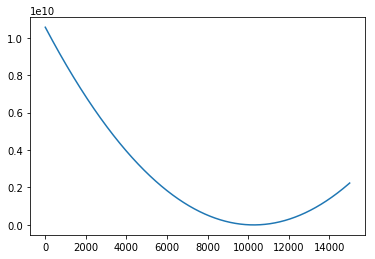

In [350]:
plt.plot(bbox_areas)

In [351]:
step_list = sorted(step_list, key=lambda x:x[0][0])

In [363]:
def display_points(points):
    min_x = min([x[0][0] for x in points])
    max_x = max([x[0][0] for x in points])
    min_y = min([x[0][1] for x in points])
    max_y = max([x[0][1] for x in points])
    used = set([x[0] for x in points])
    s = ""
    for r in range(min_y, max_y+1):
        for c in range(min_x, max_x+1):
            if (c, r) in used:
                s += "#"
            else:
                s += "."
        s += "\n"
    print(s)

In [364]:
display_points(step_list[0][1])

.####...######..#....#..#....#...####....####....####...#....#
#....#..#.......##...#..#...#...#....#..#....#..#....#..#....#
#.......#.......##...#..#..#....#.......#.......#.......#....#
#.......#.......#.#..#..#.#.....#.......#.......#.......#....#
#.......#####...#.#..#..##......#.......#.......#.......######
#..###..#.......#..#.#..##......#.......#..###..#..###..#....#
#....#..#.......#..#.#..#.#.....#.......#....#..#....#..#....#
#....#..#.......#...##..#..#....#.......#....#..#....#..#....#
#...##..#.......#...##..#...#...#....#..#...##..#...##..#....#
.###.#..#.......#....#..#....#...####....###.#...###.#..#....#



In [365]:
# Part 2

In [368]:
target_bbox = step_list[0][0][0]

In [370]:
lines = [x.strip() for x in open('day10.in').readlines()]
def get_point_from_str(s):
    x, y, dx, dy = [int(x) for x in re.findall(r"[+-]?\d+", s)]
    return (x,y), (dx, dy)
points = [get_point_from_str(x) for x in lines]

In [371]:
step_list = []
for i in range(1, 15000):
    points = [step(x) for x in points]
    bbox = bounding_box(points)
    if bbox[0] == target_bbox:
        print(i)
        break

10274


# Day 11

In [434]:
serial = 8868

In [446]:
def get_power_raw(x, y, serial):
    a = x + 10
    rack_power = a
    a = a * y
    a  = a + serial
    a = a * rack_power
    a = a // 100 
    a = a % 10
    a = a - 5
    return a

In [449]:
get_power_raw(3,5,8)

4

In [450]:
get_power_raw(122,79,57)

-5

In [451]:
get_power_raw(217,196,39)

0

In [452]:
get_power_raw(101,153,71)

4

In [453]:
grid = {}
for i in range(1,301):
    for j in range(1,301):
        grid[(i,j)] = get_power_raw(i,j,serial)

In [454]:
def get_power_grid(i,j,grid):
    total = 0
    for dx in range(0,3):
        for dy in range(0,3):
            p = (i+dx, j+dy)
            if p not in grid:
                return -100
            total += grid[p]
    return total

powers = []
for i in range(1, 301):
    for j in range(1, 301):
        powers.append(((i,j), get_power_grid(i,j,grid) ))

In [455]:
powers = sorted(powers,key=lambda x: x[1], reverse=True)

In [456]:
powers[0]

((241, 40), 30)

In [457]:
# Part 2

In [464]:
def get_power_grid(i,j,grid,size):
    total = 0
    mx = i + size
    my = j + size
    if mx > 300 or my > 300:
        return - 100
    return np.sum(grid[i:mx,j:my])

In [465]:
import numpy as np
np_grid = np.zeros(shape=(301,301))
for i in range(1,301):
    for j in range(1, 301):
        np_grid[i][j] = grid[(i,j)]

In [467]:
powers = []
for k in range(2,301):
    print(k)
    for i in range(1, 301):
        for j in range(1, 301):        
            powers.append(((i,j,k), get_power_grid(i,j,np_grid,k)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [468]:
powers = sorted(powers,key=lambda x: x[1], reverse=True)
powers[0]

((166, 75, 12), 71.0)

# Day 12

In [533]:
initial_state = "###.......##....#.#.#..###.##..##.....#....#.#.....##.###...###.#...###.###.#.###...#.####.##.#....#"
initial_state = "."*100 + initial_state + "."*100

In [534]:
initial_state

'....................................................................................................###.......##....#.#.#..###.##..##.....#....#.#.....##.###...###.#...###.###.#.###...#.####.##.#....#....................................................................................................'

In [535]:
moves = """..... => .
#..## => .
..### => #
..#.# => #
.#.#. => .
####. => .
##.## => #
#.... => .
#...# => .
...## => .
##..# => .
.###. => #
##### => #
#.#.. => #
.##.. => #
.#.## => .
...#. => #
#.##. => #
..#.. => #
##... => #
....# => .
###.# => #
#..#. => #
#.### => #
##.#. => .
###.. => #
.#### => .
.#... => #
..##. => .
.##.# => .
#.#.# => #
.#..# => ."""

In [536]:
moves = [x.strip().split(" => ") for x in moves.split("\n")]

In [537]:
def generation(state, moves):
    move_map = {x[0]:x[1] for x in moves}
    new_state = ".."
    for i in range(2, len(state) - 3):
        strip = state[i-2:i+3]
        if strip not in move_map:
            raise ValueError(strip)
        new_state += move_map[strip]
    new_state += ".."
    return new_state

In [538]:
new_state = initial_state
for i in range(20):
    new_state = generation(new_state, moves)
num_on = [x for x in new_state if x == "#"]
print(len(num_on))

47


In [540]:
start_value = -100
total = 0
for i, c in enumerate(new_state):
    if c == '#':
        total += start_value
    start_value += 1

In [541]:
total, start_value

(3221, 180)

In [544]:
## Part 2

In [549]:
initial_state = "###.......##....#.#.#..###.##..##.....#....#.#.....##.###...###.#...###.###.#.###...#.####.##.#....#"
initial_state = "."*1000 + initial_state + "."*1000

In [554]:
def calc_total(new_state):
    start_value = -1000
    total = 0
    for i, c in enumerate(new_state):
        if c == '#':
            total += start_value
        start_value += 1
    return total
        
new_state = initial_state
for i in range(401):
    new_state = generation(new_state, moves)
    num_on = [x for x in new_state if x == "#"]
    print(i, calc_total(new_state))

0 3093
1 2695
2 2922
3 2885
4 2785
5 2752
6 2989
7 3109
8 2894
9 2680
10 2957
11 2988
12 2880
13 2883
14 3011
15 3073
16 3127
17 3164
18 3092
19 3221
20 3411
21 3225
22 3399
23 3400
24 3363
25 3431
26 3454
27 3558
28 3778
29 3528
30 3627
31 3617
32 3920
33 3647
34 3798
35 3653
36 3995
37 4024
38 3953
39 3936
40 4151
41 4044
42 4001
43 4129
44 4374
45 4052
46 4152
47 4175
48 4455
49 4467
50 4445
51 4694
52 4648
53 4590
54 4630
55 4589
56 5027
57 4873
58 4721
59 5160
60 5124
61 5066
62 5301
63 5079
64 5290
65 5351
66 5406
67 5428
68 5388
69 5351
70 5591
71 5361
72 5640
73 5716
74 5595
75 5971
76 5952
77 6105
78 6213
79 6235
80 6408
81 6490
82 6443
83 6461
84 6420
85 6416
86 6545
87 6407
88 6581
89 6503
90 6673
91 6566
92 6781
93 6663
94 6774
95 6834
96 6980
97 6831
98 6873
99 6930
100 7180
101 7027
102 6974
103 7226
104 7279
105 7322
106 7375
107 7622
108 7573
109 7825
110 7865
111 7936
112 7883
113 7929
114 7781
115 8032
116 7992
117 8028
118 7875
119 8131
120 8192
121 8126
122 8077
123

In [557]:
(50000000000 - 400) * (22724 - 22672) + 22672

2600000001872

# Day 13

In [ ]:
dirs = [
    ()
]
class Cart(object):
    def __init__(self, x, y, s):
        if s 